In [8]:
%reload_ext autoreload
%autoreload 2
import opdproblem as opd
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import joblib
import sys
from tqdm import tqdm
import time
from itertools import combinations


# Importar Dataframes de los experimentos

In [2]:
# Cargar DataFrame desde el archivo
df_unbounded_homogeneous = joblib.load('df_unbounded_homogeneous.pkl')

In [3]:
# Cargar DataFrame desde el archivo
df_unbounded_non_homogeneous = joblib.load('df_unbounded_non_homogeneous.pkl')

In [4]:
# Cargar DataFrame desde el archivo
df_bounded_homogeneous = joblib.load('df_bounded_homogeneous.pkl')

In [4]:
# Cargar DataFrame desde el archivo
df_bounded_non_homogeneous_100 = joblib.load('dataframes_min/df_bounded_non_homogeneous_100.pkl')

In [40]:
df_bounded_non_homogeneous_100[df_bounded_non_homogeneous_100['clique']=='k7'].head(40)

,clique,inf,random,both,opd,min_certificate
750,k7,"[(0, 2), (1, 2)]","[(0, 2), (1, 2)]","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x7a...,"[(0, 1), (0, 2), (1, 2)]"
751,k7,"[(0, 2), (1, 2)]","[(0, 2), (1, 2)]","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x7a...,"[(0, 1), (0, 2), (1, 2)]"
752,k7,"[(0, 5), (1, 5)]","[(0, 5), (1, 5)]","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x7a...,"[(0, 1), (0, 5), (1, 5)]"
753,k7,"[(0, 1), (0, 2), (1, 2)]","[(0, 1), (0, 2), (1, 2)]","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x7a...,"[(0, 1), (0, 2), (1, 2)]"
754,k7,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x7a...,"[(0, 1)]"
755,k7,"[(0, 1), (0, 4), (1, 4)]","[(0, 1), (0, 4), (1, 4)]","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",<opdproblem.OPDproblem.OPDGraph object at 0x7a...,"[(0, 1), (0, 4), (1, 4)]"
756,k7,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x7a...,"[(0, 1)]"
757,k7,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x7a...,"[(0, 1)]"
758,k7,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x7a...,"[(0, 1)]"
759,k7,"[(0, 1)]","[(0, 1)]","[(0, 1)]",<opdproblem.OPDproblem.OPDGraph object at 0x7a...,"[(0, 1)]"


In [7]:
# Cargar DataFrame desde el archivo
df_bounded_non_homogeneous_100 = joblib.load('df_bounded_non_homogeneous_10000.pkl')

# Desarrollo

In [ ]:

cliques = df_unbounded_homogeneous['clique'].unique()
dfclique_list =[]
# Límite de tiempo en segundos para cada iteración
limite_tiempo_iteracion = 7200  # Por ejemplo, 1 hora

for clique in tqdm(cliques, desc='Procesando clique', unit='clique'):
    tiempo_inicio_iteracion = time.time()
    

    df = df_unbounded_homogeneous[df_unbounded_homogeneous['clique'] == clique].copy()
    # Calculo de beta para cada alg
    df.loc[:,'min_certificate'] = df.apply(lambda row: row['opd'].min_certificate(), axis=1)
    # Tiempo transcurrido en la iteración
    dfclique_list.append(df)

    tiempo_transcurrido = time.time() - tiempo_inicio_iteracion
    
    # Verificar si se ha superado el límite de tiempo
    if tiempo_transcurrido > limite_tiempo_iteracion:
        print(f"Se ha superado el límite de tiempo en el clique {clique}")
        break
df_concatenado = pd.concat(dfclique_list)
joblib.dump(df_concatenado, 'dataframes_min/df_unbounded_homogeneous.pkl')

Procesando clique:   7%|█▌                   | 2/27 [00:07<01:53,  4.52s/clique]

In [ ]:
# %%timeit
# C = G.min_certificate()

# Revision

In [6]:
# Cargar DataFrame desde el archivo
df_bounded_non_homogeneous_100 = joblib.load('df_bounded_non_homogeneous_1000.pkl')

In [41]:
opd_false = df_bounded_non_homogeneous_100.loc[766]['opd']

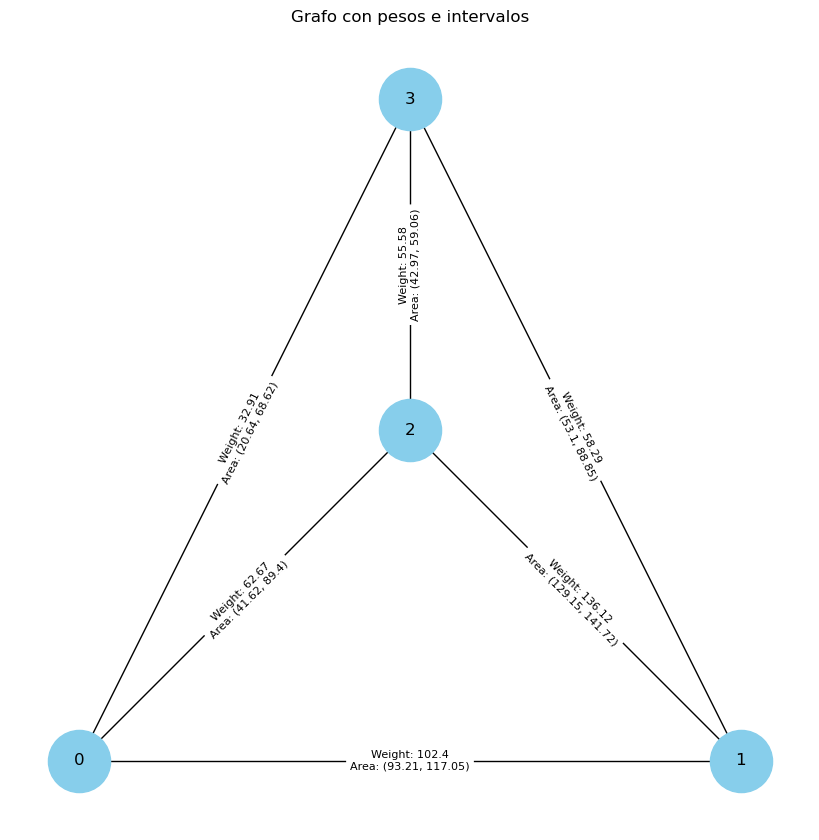

In [13]:

# Redondear los pesos a dos decimales
G = opd_false.graph
for u, v in G.edges():
    G[u][v]['weight'] = round(G[u][v]['weight'], 2)

# Redondear las áreas a dos decimales
for u, v in G.edges():
    area_start, area_end = G[u][v]['area']
    G[u][v]['area'] = (round(area_start, 2), round(area_end, 2))

# Obtener los pesos y áreas de las aristas
weights = [G[u][v]['weight'] for u, v in G.edges()]
areas = [G[u][v]['area'] for u, v in G.edges()]

# Dibujar el grafo con más espacio entre nodos
plt.figure(figsize=(8, 8))
pos = nx.planar_layout(G)  # Posiciones de los nodos
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000)

# Ajustar las etiquetas de peso para que no se superpongan
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"Weight: {G[u][v]['weight']}\nArea: {G[u][v]['area']}" for u, v in G.edges()}, label_pos=0.5, font_size=8)

# Mostrar la gráfica
plt.title('Grafo con pesos e intervalos')
plt.show()

In [16]:
# Encontrar el camino de peso mínimo entre dos vértices
inicio = 0
fin = 1
shortest_path = nx.shortest_path(G, source=inicio, target=fin, weight='weight')
shortest_path_weigth = nx.shortest_path_length(G, source=inicio, target=fin, weight='weight')

print("Camino más corto entre", inicio, "y", fin, ":", shortest_path)


Camino más corto entre 0 y 1 : [0, 3, 1]


In [18]:
cert = opd_false.min_certificate()
es = opd_false.certificate([(0, 3), (1, 3)], shortest_path_weigth)
print(cert)
print(es)

[(0, 1), (0, 3), (1, 3)]
True


# Combinado

In [42]:
%%timeit

s = 0 
t = 1

optimal_path = nx.shortest_path(opd_false.graph, source=s, target=t, weight='weight')
optimal_path_weight = nx.shortest_path_length(opd_false.graph, source=s, target=t, weight='weight')

edges_certificate = [(optimal_path[i], optimal_path[i + 1]) for i in range(len(optimal_path) - 1)]
edges_certificate = [(min(u, v), max(u, v)) for u, v in edges_certificate]
edges_graph = list(opd_false.graph.edges())

# Eliminar aristas que pertenecen al camino optimo
edges_graph = list(set(edges_graph) - set(edges_certificate))

k = False
for i in range(len(edges_graph) + 1):
    for j, test in enumerate(combinations(edges_graph, i)):

        # Certificate bot
        # Create list to test certificate
        cert_test_bot = set(edges_certificate)
        cert_test_bot.update(test)
        l_aux1 = list(cert_test_bot)
        #print(cert_test)
        # Test certificate
        certificate_bot = opd_false.certificate(l_aux1, optimal_path_weight, alpha=1)
        if certificate_bot:
            break        
            
        # Certificate top
        # Create list to test certificate
        cert_test_top = set(list(opd_false.graph.edges()))
        cert_test_top = cert_test_top.difference(test)
        l_aux2 = list(cert_test_top)

        # Test certificate
        certificate_top = opd_false.certificate(l_aux2, optimal_path_weight, alpha=1)
        if certificate_top:
            prop = l_aux2
            break
        elif j == len(list(combinations(edges_graph, i))) - 1:  
            k = True
            break
    if certificate_bot:
        break
    if k:
        break


6.77 s ± 157 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [50]:
print(prop)

None


# Top

In [43]:
%%timeit

s = 0 
t = 1

optimal_path = nx.shortest_path(opd_false.graph, source=s, target=t, weight='weight')
optimal_path_weight = nx.shortest_path_length(opd_false.graph, source=s, target=t, weight='weight')

edges_certificate = [(optimal_path[i], optimal_path[i + 1]) for i in range(len(optimal_path) - 1)]
edges_certificate = [(min(u, v), max(u, v)) for u, v in edges_certificate]
edges_graph = list(opd_false.graph.edges())

# Eliminar aristas que pertenecen al camino optimo
edges_graph = list(set(edges_graph) - set(edges_certificate))

k = False
for i in range(len(edges_graph) + 1):
    for j, test in enumerate(combinations(edges_graph, i)):
            
        # Certificate top
        # Create list to test certificate
        cert_test_top = set(list(opd_false.graph.edges()))
        cert_test_top = cert_test_top.difference(test)
        l_aux2 = list(cert_test_top)

        # Test certificate
        certificate_top = opd_false.certificate(l_aux2, optimal_path_weight, alpha=1)
        if certificate_top:
            prop = l_aux2
            break
        elif j == len(list(combinations(edges_graph, i))) - 1:  
            k = True
            break
    if k:
        break

#print(prop)    
            

KeyboardInterrupt: 

# Bot

In [45]:
%%timeit

s = 0 
t = 1

optimal_path = nx.shortest_path(opd_false.graph, source=s, target=t, weight='weight')
optimal_path_weight = nx.shortest_path_length(opd_false.graph, source=s, target=t, weight='weight')

edges_certificate = [(optimal_path[i], optimal_path[i + 1]) for i in range(len(optimal_path) - 1)]
edges_certificate = [(min(u, v), max(u, v)) for u, v in edges_certificate]
edges_graph = list(opd_false.graph.edges())

# Eliminar aristas que pertenecen al camino optimo
edges_graph = list(set(edges_graph) - set(edges_certificate))


for i in range(len(edges_graph) + 1):
    for j, test in enumerate(combinations(edges_graph, i)):

         # Certificate bot
        # Create list to test certificate
        cert_test_bot = set(edges_certificate)
        cert_test_bot.update(test)
        l_aux1 = list(cert_test_bot)
        #print(cert_test)
        # Test certificate
        certificate_bot = opd_false.certificate(l_aux1, optimal_path_weight, alpha=1)
        if certificate_bot:
            break        
       
    if certificate_bot:
        break


1.83 s ± 25.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
df_bounded_non_homogeneous_100.loc[37]

clique                                                            k4
inf                                                 [(0, 3), (1, 3)]
random                                      [(0, 1), (0, 3), (1, 3)]
both                        [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)]
opd                <opdproblem.OPDproblem.OPDGraph object at 0x7a...
min_certificate                             [(0, 1), (0, 3), (1, 3)]
Name: 37, dtype: object